#  1. univariable linear regression ex1单变量线性回归ex1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
inputarr = np.loadtxt('data/ex1data1.txt', delimiter=',')
inputarr.shape,inputarr[:,0].size

((97, 2), 97)

inputarr:
the first column is x (input variables) and the second column is y (output)

[:, :-1] means to take out all the rows, and the columns except the last columns, or we can use [:,1] . because here is the second column.

np.insert(arr, obj, values, axis=None)
obj defines the index before which values is inserted 

axis is the level, for example,  
a = 
[
 [[1,2,3,4],
 [4,5,6,8]],
 
 [[7,8,9,2],
 [10,11,12,1]],
 
 [[13,14,15,4],
  [16,17,18,5]]
]
a,shape  (3,2,4)   there are 3 elements along axis=0; 2 elements on axis=1; and 4 elements on axis=3

and insert(...,axis=none) means flattern array first then insert; otherwise, it means insert elements along the axis

after the below operation, 
we insert a column in X as the first column (index = 0) with value of 1

**WHY?**
这是因为需要使得 X和theta矩阵相乘，得到假设函数输出向量。

$h=\theta_0 + \theta_1x$



In [3]:
X =inputarr[:,:-1]
X = np.insert(X,0,1,axis=1)
X.shape,X.size

((97, 2), 194)

In [4]:
y = inputarr[:,-1:]
y.shape

(97, 1)

here is some example used to understand what's :,-1,  :-1:,   etc. meaning

use this label method, we can express [:,:-1] as all rows, all columns except the last column, so if we have multiple input variables, we need not to change the code. 

[:, -1:] to denote all rows, the last column. so no matter how many columns we have, we don't need to change the code. 

In [5]:
example = np.array( [[1,2,3],[3,4,5],[6,7,8]])
another1 = example[:,-1]
another2 = example[:,-1:]
another3 = example[:,1:]
another4 = example[:,:-1]
print(another1)
print(another2)
print(another3)
print(another4)

[3 5 8]
[[3]
 [5]
 [8]]
[[2 3]
 [4 5]
 [7 8]]
[[1 2]
 [3 4]
 [6 7]]


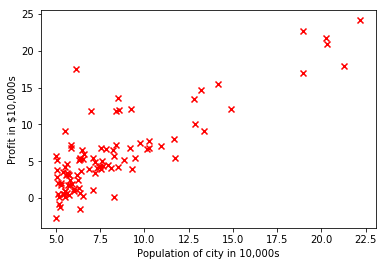

In [6]:

# plot the scatter figure 
plt.scatter(X[:,1],y,c='r',marker='x')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.show()

for invariable linear regression, hyposis function: 

$h(x) = \theta_0 + \theta_1x$

X is a two dimensional matrix about input variables 

the number of variables **+ 1** is the number of columns  i.e X.shape[1] 

and the number of sample recodes in the number of rows  i.e X.shape[0] 

so the following np array theta with dimenstion (X.shape[1], 1) , the numbers of rows is the number of input variables


In [7]:
theta = np.zeros((X.shape[1],1))
theta.shape

(2, 1)

compute gradient using a numeric method.

h is an error

f is the gradient function 

x is the variable matrix of f, for example, theta, (n,1) with $n$ variables. 


In [8]:
def numeric_gradient(f,x):
    h = 1e-4 #0.0001
    
    grad = np.zeros_like(x) # generate an array with the same shape with x and all elements are zero
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # compute f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #compute f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # make x to its orginal values
        
    return grad    

In [9]:
def mean_squared_error(y, t): # junfang wucha 
    return 0.5 * np.sum((y-t)**2) / (t.size)

In [10]:
def loss(x,t, theta):
    y = predict(x,theta)
    return mean_squared_error(y,t)

theta : [[theta0], 
            [theta1], 
            [theta2],
            ...
           ] 
 X:    (nsamples, nvariables+1)
 X is a two dimensional matrix about input variables 

In [11]:
def predict(x, theta):
    return np.dot(x,theta)

In [12]:
loss(X,y,theta)

32.072733877455676

In [13]:
def gradientDescent(x, theta):
    lr = 0.01 #learning rate
    step_num = 1500    
    cost_vals = np.zeros((step_num))
    thetahistory=[]

    loss_W = lambda W: loss(x,y,theta)

    for i in range(step_num) :
        grad = numeric_gradient(loss_W, theta)
        for j in range(len(theta)):
            theta[j,0] -= lr * grad[j]        
        cost_vals[i] = loss(x,y,theta)
        thetahistory.append(list(theta[:,0]))
        
    return thetahistory, cost_vals, theta

In [14]:
thetahistory, cost_vals, theta_final = gradientDescent(X, theta)

In [15]:
thetahistory[0:10]

[[0.029195425257810825, 0.32662389774245071],
 [0.044918944985194997, 0.51911428584867636],
 [0.052710431769575905, 0.63261578733762036],
 [0.055832213360895722, 0.69960205527013208],
 [0.056205413298826556, 0.73919622601219537],
 [0.054961344665027667, 0.76265956251426736],
 [0.052766215708421882, 0.77662361525727697],
 [0.050012343008809523, 0.78499358231138849],
 [0.046930753386797974, 0.79006916302017949],
 [0.043657493095539124, 0.7932046080950883]]

In [16]:
theta_final

array([[-2.86634309],
       [ 1.08956589]])

In [17]:
loss(X,y,theta_final)

4.5734507060112755

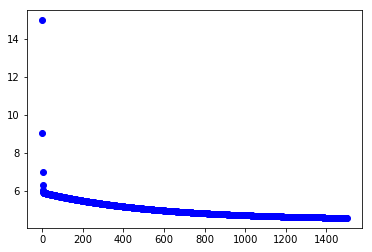

In [18]:
step_num = 1500

ite_x = np.arange(0,step_num,1)
plt.plot(ite_x, cost_vals, 'bo')

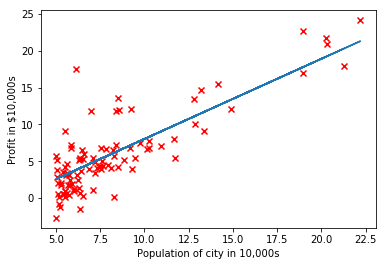

In [19]:
plt.scatter(X[:,1],y[:,0],c='r',marker='x')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")

plt.plot(X[:,1], predict(X,theta_final))
plt.show()

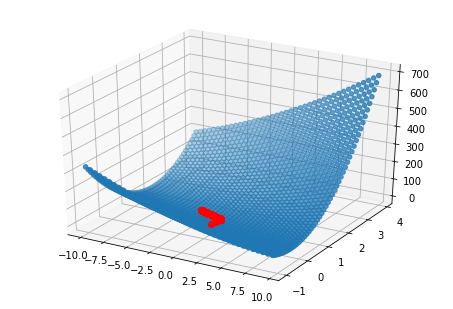

In [20]:
theta0_vals = np.arange(-10,10,0.5)
theta1_vals = np.arange(-1,4,0.1)


myx,myy,myz = [],[],[]  # parameters of Axes3D.scatter  is a list not np.array
jval_z = np.zeros((theta1_vals.size,theta0_vals.size))

thetatemp = np.zeros((2,1))
theta = np.zeros((2,1))

for i in range(0,theta0_vals.size):
    for j in range(0,theta1_vals.size):
        myx.append(theta0_vals[i])
        myy.append(theta1_vals[j])
        theta[0,0] = theta0_vals[i]
        theta[1,0] = theta1_vals[j]
        c = loss(X,y,theta)
        myz.append(c)
        jval_z[j,i] = c


fig = plt.figure()
ax = Axes3D(fig)

scat = ax.scatter(myx,myy,myz)

plt.plot([thetatemp[0] for thetatemp in thetahistory],[thetatemp[1] for thetatemp in thetahistory],cost_vals.tolist(),'ro-')

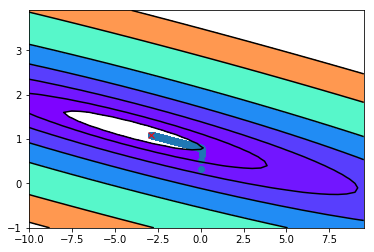

In [21]:
fig2 = plt.figure()

jval_list = jval_z

plt.contour(theta0_vals,theta1_vals,jval_list, levels=[6,10,20,40,80,180,300],colors='k')
plt.contourf(theta0_vals,theta1_vals,jval_list,  levels=[6,10,20,40,80,180,300],cmap="rainbow")

plt.plot(theta_final[0,0],theta_final[1,0],marker='x',c='r')

plt.scatter([m[0] for m in thetahistory],[m[1] for m in thetahistory])

In [22]:
theta_final

array([[-2.86634309],
       [ 1.08956589]])

In [23]:
theta

array([[ 9.5],
       [ 3.9]])

#  2.有多个x变量（预测值受多个x影响）的情况

## 首先来观察x的直方图

In [24]:
# read multiple x
inputarr2 = np.loadtxt('data/ex1data2.txt', delimiter=',')
inputarr2.shape, inputarr2[:,0].size

((47, 3), 47)

In [25]:
type(inputarr2[:,0])

numpy.ndarray

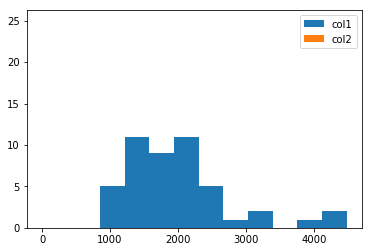

In [26]:
fig_hist_x = plt.figure()
plt.hist(inputarr2[:,0],label='col1')
plt.hist(inputarr2[:,1],label='col2')
#plt.hist(inputarr2[:,2],label='col3')
plt.legend()
plt.show()

# 特征缩放

In [27]:
mean_arr, std_arr = [], []

np.mean(inputarr2[:,0]), np.std(inputarr2[:,0]) 

(2000.6808510638298, 786.20261874304674)

In [28]:
inputarr2_norm  = inputarr2.copy() #复制输入数据的数组；这是为了正则化时仍然保留原始数据

inputarr2_norm.shape[1]

for varidx in range(0,inputarr2_norm.shape[1]): # 对每个变量均要进行正则化，inputarr2一个二维数组，第一维为变量实例的个数；第二维为变量个数；因此，取shape[1]是变量的个数
    mean_arr.append(np.mean(inputarr2_norm[:,varidx]))
    std_arr.append(np.std(inputarr2_norm[:,varidx]))
    
    inputarr2_norm[:,varidx] = (inputarr2_norm[:,varidx] - mean_arr[-1])/std_arr[-1]
    
    

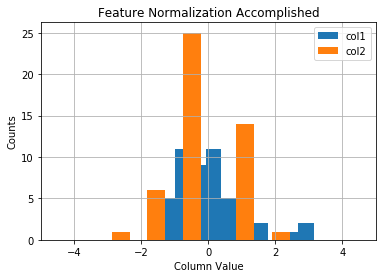

In [29]:
#Quick visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(inputarr2_norm[:,0],label = 'col1')
dummy = plt.hist(inputarr2_norm[:,1],label = 'col2')
#dummy = plt.hist(inputarr2_norm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [30]:
initial_theta = np.zeros((inputarr2_norm.shape[1],1))

thetahistory, cost_vals, theta = gradientDescent(inputarr, theta)



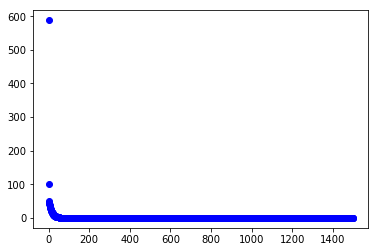

In [31]:
step_num = 1500

ite_x = np.arange(0,step_num,1)
plt.plot(ite_x, cost_vals, 'bo')

In [35]:
#print "Final result theta parameters: \n",theta

ytest = np.array([1650.,3.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x]-mean_arr[x+1])/std_arr[x+1] for x in range(0,len(ytest))]
np.insert(ytestscaled,0,1,axis=1)
predict(ytestscaled, theta)

AxisError: axis 1 is out of bounds for array of dimension 1